# Project Overview: 

* We will predict future commodity(Avocado) price using Facebook prophet

* Facebook prophet works best with time series that have strong seasonal effects

* We shall study the data seasonality across Months, and Years.

* We shall make predictions of Avocado price by predicting the future trend

# Section 1: Problem Statement

* Data represent weekly 2018 retail scan data for National(USA) retail volume (units) and price

* Retail scan data comes directly from retailer's cash register based on actual retail sales of Hass avocados

* Starting from 2013, the table below reflects an expanded multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military

* The average price (of Avocados) in the table reflects a per unit (per Avocado) cost, even when multiple units (Avocados) are sold in bag.

* The product lookup codes (PLU'S) in the table are only for Hass avocados. Other variesties of Avocados (e.g. greenskins) are not included in the table.

Some relevant columns in the dataset:

* Date- The date of the observation.

* AveragePrice- The average price of a single avocado

* type -conventional or organic.

* year -the year

* Region  -the city or region of the observation

* Total volume -the total number of avocados sold.

* 4046 - total number of avocados with PLU 4046 sold

* 4225 - total number of avocados with PLU 4225 sold

* 4770 - total number of avocados with PLU 4770 sold

In [1]:
## Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns 
from fbprophet import Prophet

In [2]:
avocado_df = pd.read_csv('avocado.csv')

In [3]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Section 2: Explore the Dataset

In [4]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
# sort the data in chronological order
avocado_df = avocado_df.sort_values('Date')

In [7]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


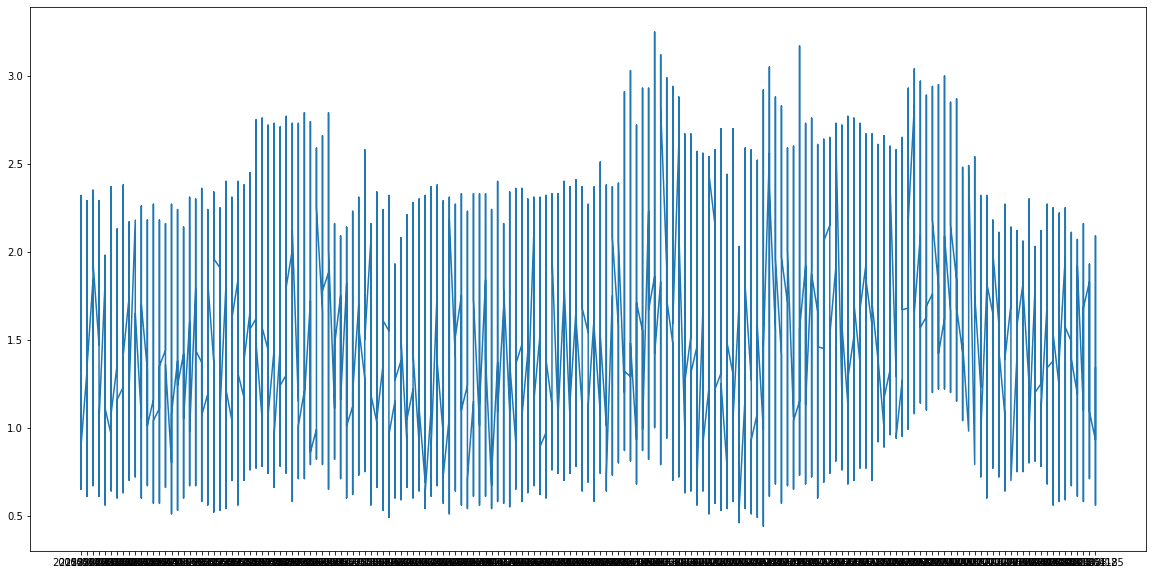

In [8]:
# Visualize Date vs AveragePrice 
plt.figure(figsize =(20,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

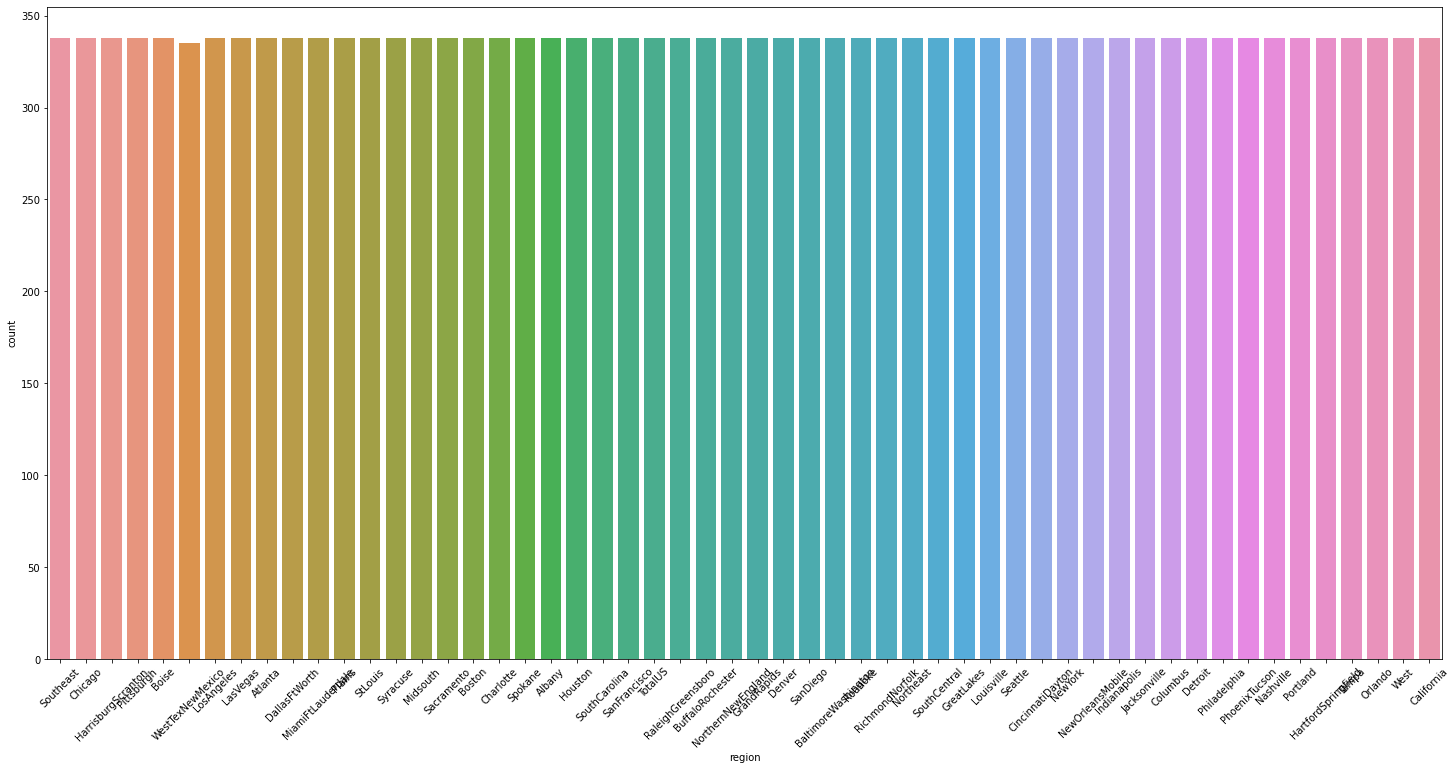

In [9]:
# We want to count elements of the avocado dataset based on the region
plt.figure(figsize=(25,12))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation =45)

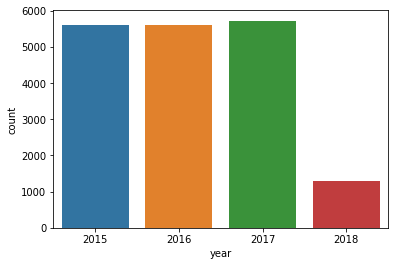

In [10]:
# compare the sales to the year
sns.countplot(x ='year', data= avocado_df)

In [11]:
# Extract a new data frame(containing only date and averageprice) from the original dataset that we will use to make predictions
avocado_prophet_df = avocado_df[['Date','AveragePrice']]

In [12]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# Section 3: Make Predicitons

In [13]:
avocado_prophet_df= avocado_prophet_df.rename(columns ={'Date':'ds','AveragePrice':'y'})

In [14]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [15]:
# train our model
m = Prophet()


In [16]:
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
#forecast the future
future = m.make_future_dataframe(periods= 365)
forecast = m.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.937858,1.877698,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.892143,1.842172,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.915938,1.863579,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.863599,1.839017,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.864323,1.850185,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.571649,1.639999,0.975828,1.339753,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.565613,1.591459,0.974653,1.340336,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.557728,1.565135,0.973477,1.340703,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.570158,1.617745,0.971888,1.341348,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


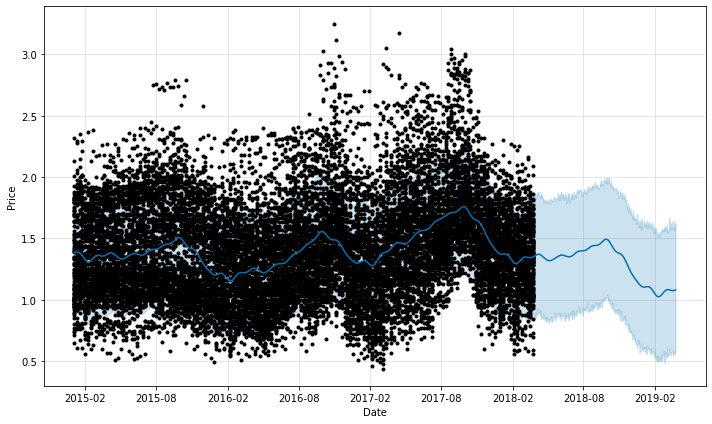

In [19]:
figure = m.plot(forecast, xlabel= 'Date', ylabel='Price')

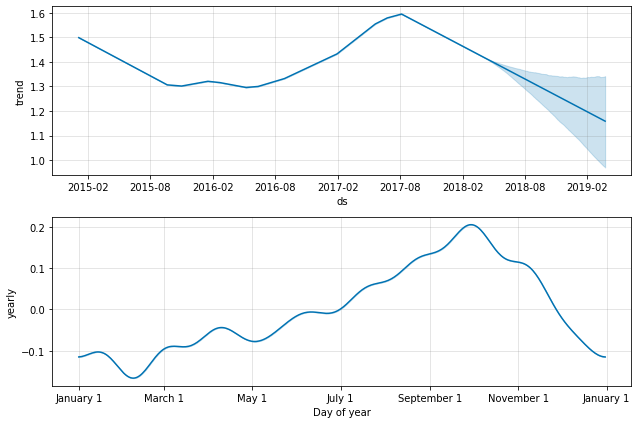

In [20]:
figure = m.plot_components(forecast)

# Section 4: Make Predicitons(for Specific Regions)

In [21]:
avocado_df =pd.read_csv('avocado.csv')

In [22]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [23]:
avocado_sample_df =avocado_df[   avocado_df['region']== 'SouthCentral'   ]

In [24]:
avocado_sample_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2340,0,2015-12-27,0.81,4831664.77,2295315.43,1290847.05,392846.12,852656.17,663310.00,105317.59,84028.58,conventional,2015,SouthCentral
2341,1,2015-12-20,0.81,4565207.85,2166801.03,1226508.86,412828.75,759069.21,555356.92,95639.50,108072.79,conventional,2015,SouthCentral
2342,2,2015-12-13,0.78,4869309.42,2366879.80,1559601.21,271514.98,671313.43,554563.94,115546.32,1203.17,conventional,2015,SouthCentral
2343,3,2015-12-06,0.76,4938526.47,2271088.12,1989750.87,38648.11,639039.37,496732.56,141970.00,336.81,conventional,2015,SouthCentral
2344,4,2015-11-29,0.82,3969578.89,2105670.46,1234911.39,27985.18,601011.86,505843.61,95136.58,31.67,conventional,2015,SouthCentral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18148,7,2018-02-04,1.41,135996.73,29097.18,3815.01,0.00,103084.54,96116.60,6967.94,0.00,organic,2018,SouthCentral
18149,8,2018-01-28,1.42,137453.79,29301.71,4418.91,0.00,103733.17,98629.14,5104.03,0.00,organic,2018,SouthCentral
18150,9,2018-01-21,1.44,138349.93,22596.66,3200.09,0.00,112553.18,105354.48,7198.70,0.00,organic,2018,SouthCentral
18151,10,2018-01-14,1.50,146720.73,31829.24,4472.99,0.00,110418.50,102266.31,8152.19,0.00,organic,2018,SouthCentral


In [25]:
avocado_sample_df = avocado_sample_df.sort_values('Date')

In [26]:
avocado_sample_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2391,51,2015-01-04,0.77,5144267.01,2745009.10,1755142.21,73432.89,570682.81,442217.85,128451.37,13.59,conventional,2015,SouthCentral
11517,51,2015-01-04,1.35,53494.91,24139.72,8586.46,0.00,20768.73,20622.28,146.45,0.00,organic,2015,SouthCentral
2390,50,2015-01-11,0.80,5409726.02,2973367.52,1717171.24,88373.78,630813.48,533599.20,97164.07,50.21,conventional,2015,SouthCentral
11516,50,2015-01-11,1.39,53328.53,27767.97,8596.61,0.00,16963.95,16873.34,90.61,0.00,organic,2015,SouthCentral
2389,49,2015-01-18,0.79,5322625.57,2839359.92,1782045.18,146481.44,554739.03,497106.16,57607.18,25.69,conventional,2015,SouthCentral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,2,2018-03-11,1.32,179212.94,29896.39,5707.77,0.00,143608.78,126427.81,17180.97,0.00,organic,2018,SouthCentral
18142,1,2018-03-18,1.28,154056.32,27820.20,6264.66,0.00,119971.46,101198.09,18773.37,0.00,organic,2018,SouthCentral
9019,1,2018-03-18,0.86,6579144.13,3289390.32,1115203.69,28384.40,2146165.72,1625982.91,455350.18,64832.63,conventional,2018,SouthCentral
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


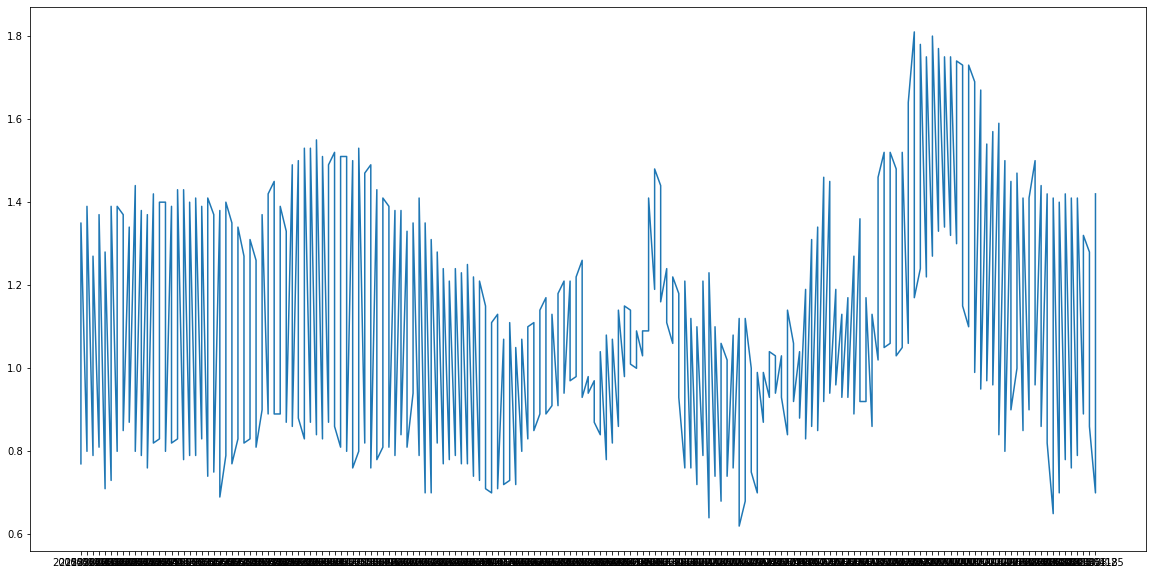

In [27]:
plt.figure(figsize=(20,10))
plt.plot(avocado_sample_df['Date'],avocado_sample_df['AveragePrice'])

In [28]:
# rename the columns
avocado_sample_df = avocado_sample_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [29]:
avocado_sample_df

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2391,51,2015-01-04,0.77,5144267.01,2745009.10,1755142.21,73432.89,570682.81,442217.85,128451.37,13.59,conventional,2015,SouthCentral
11517,51,2015-01-04,1.35,53494.91,24139.72,8586.46,0.00,20768.73,20622.28,146.45,0.00,organic,2015,SouthCentral
2390,50,2015-01-11,0.80,5409726.02,2973367.52,1717171.24,88373.78,630813.48,533599.20,97164.07,50.21,conventional,2015,SouthCentral
11516,50,2015-01-11,1.39,53328.53,27767.97,8596.61,0.00,16963.95,16873.34,90.61,0.00,organic,2015,SouthCentral
2389,49,2015-01-18,0.79,5322625.57,2839359.92,1782045.18,146481.44,554739.03,497106.16,57607.18,25.69,conventional,2015,SouthCentral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,2,2018-03-11,1.32,179212.94,29896.39,5707.77,0.00,143608.78,126427.81,17180.97,0.00,organic,2018,SouthCentral
18142,1,2018-03-18,1.28,154056.32,27820.20,6264.66,0.00,119971.46,101198.09,18773.37,0.00,organic,2018,SouthCentral
9019,1,2018-03-18,0.86,6579144.13,3289390.32,1115203.69,28384.40,2146165.72,1625982.91,455350.18,64832.63,conventional,2018,SouthCentral
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral


In [30]:
m = Prophet() 
m.fit(avocado_sample_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods= 730)

In [32]:
forecast = m.predict(future)

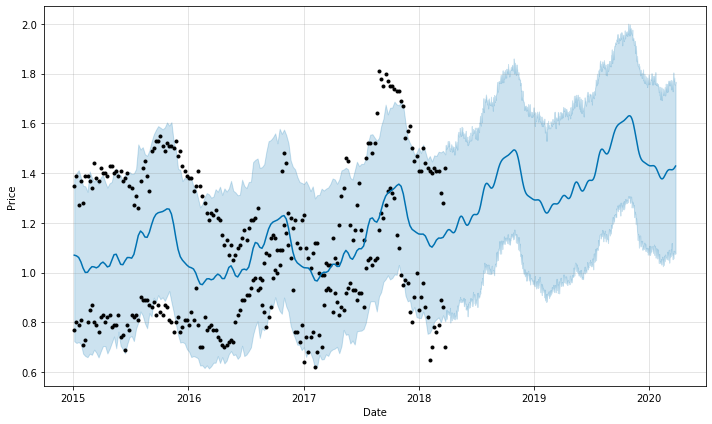

In [33]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

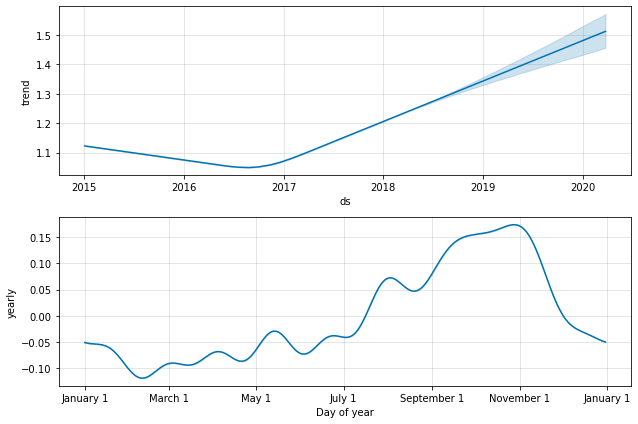

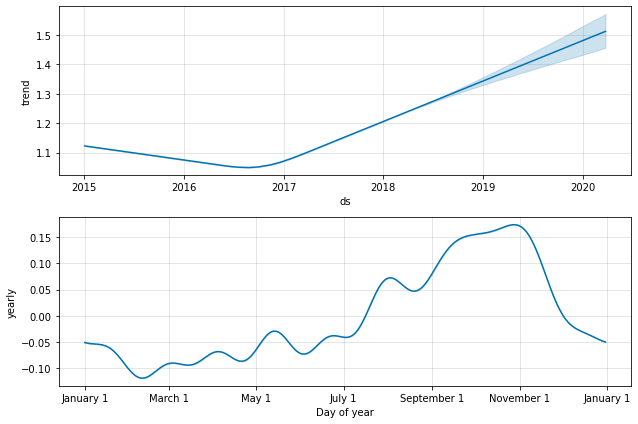

In [34]:
m.plot_components(forecast)

# Conclusion
* The forecast for the overall dataset shows a declining trend in price for the year 2019

* However, the prediciton for the SouthCentral Region shows an increasing trend in price over the next two years